In [1]:
# import library

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

In [2]:
# load image

image = cv2.imread('daun.jpg')

In [3]:
# convert image from BGR to RGB

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

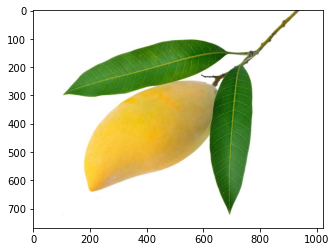

In [4]:
# show the image

plt.imshow(image)

In [5]:
print(image.dtype, image.shape)

uint8 (768, 1024, 3)


C:\Users\CRYAND~1\AppData\Local\Temp/ipykernel_880/3962179051.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


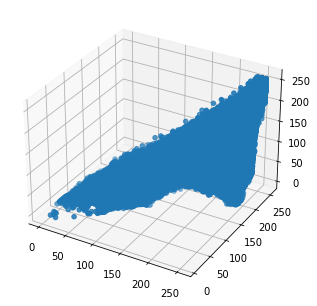

In [6]:
# showing the RGB color scatter

r, g, b = cv2.split(image)
r = r.flatten()
g = g.flatten()
b = b.flatten()#plotting 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

In [7]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)

img1D = image.reshape((-1,3))

In [8]:
print(img1D.dtype, img1D.shape)

uint8 (786432, 3)


In [9]:
# Convert to float type

Z = np.float32(img1D)

In [10]:
print(Z.dtype, Z.shape)

float32 (786432, 3)


In [18]:
# define criteria, number of clusters(K) and apply kmeans() from 
# https://docs.opencv.org/4.x/d1/d5c/tutorial_py_kmeans_opencv.html

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 5
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

In [19]:
# labelling

print(label)

[[2]
 [2]
 [2]
 ...
 [2]
 [2]
 [2]]


In [20]:
print(center)

[[ 40.065266 102.41683   13.345549]
 [ 77.03725  133.98524   44.577595]
 [255.62486  255.65886  255.22821 ]
 [239.56638  191.61084   55.842762]
 [195.67891  165.7243    85.44816 ]]


In [21]:
# back convert data into integer 8-bit values

center = np.uint8(center)
center

array([[ 40, 102,  13],
       [ 77, 133,  44],
       [255, 255, 255],
       [239, 191,  55],
       [195, 165,  85]], dtype=uint8)

In [22]:
# back to cluster

segmented_data = center[label.flatten()]
segmented_data

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

In [23]:
# reshape data into the original image dimensions

segmented_image = segmented_data.reshape((image.shape))
segmented_image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

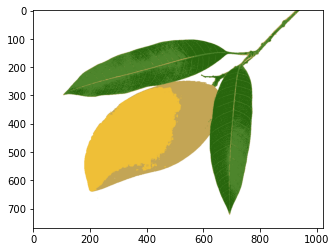

In [24]:
# visualize the segmented image

plt.imshow(segmented_image)